In [133]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import string as string


from scipy.stats import linregress
#%matplotlib notebook

csv_path = "Downloads/Housepy_raw.csv"
housepyraw_df = pd.read_csv(csv_path)
housepyraw_df.head()



C:\Users\easha\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,MLS Number,Property Type,Status,Street Number,Street Name,Unit Number,City/Location,Zip Code,County,List Price,...,List Office Name,List Agent MLSID,List Agent Full Name,Selling Office MLSID,Selling Office Name,Selling Agent MLSID,Selling Agent Full Name,Realist Owner Name,Last Change Timestamp,List Date
0,85605507,Single-Family,Sold,823,Loper,NaN,Houston,77017,Harris,"$44,500",...,The Listing Firm,oronding,Osaan Ronding,DAFA01,Reward Realty,GREENMIC,Michael Green,NaN,NaN,12/9/2014 0:00
1,67891056,Single-Family,Sold,9009,Freeland,NaN,Houston,77075,Harris,"$65,000",...,Mission Real Estate Group,jiley,Joe Iley,ILEY01,Mission Real Estate Group,jiley,Joe Iley,Trusted Legacy Hse Buyers Inc,NaN,7/15/2015 0:00
2,97810747,Single-Family,Sold,17503,Waverly Grove,NaN,Houston,77084,Harris,"$90,000",...,Intero Real Estate Services,baumd,D'Evereaux Baum,GGPR24,BHGRE Gary Greene,JilSmith,Jill Smith,NaN,NaN,3/16/2015 0:00
3,94468427,Single-Family,Sold,6619,Briar Glade,NaN,Houston,77072,Harris,"$85,900",...,Van Slyke Real Estate,vansh,Helen Van Slyke,RELM01,Realm Real Estate Professional,shaleem,Shah Haleem,Hsbc Bank Usa Na 2006-Nc3,NaN,6/1/2015 0:00
4,19671424,Single-Family,Sold,546,Glenvale,NaN,Houston,77060,Harris,"$105,000",...,"RE/MAX Northwest, REALTORS",joeluis,Jose Soria,KWPR01,Keller Williams Professionals,smgeer,Shannon Geer,NaN,NaN,3/23/2015 0:00


In [134]:
#dropping columns that wont be used to tell us anything
housepy_df = housepyraw_df[["MLS Number", "Street Number", "Street Name", "City/Location", "Zip Code", "List Price",
                           "Close Price", "Close Date", "Area", "Subdivision", "Market Area", "School District",
                           "School Elementary", "School Middle", "School High", "Sq Ft Total", "Price Sq Ft Sold", "Lot Size",
                          "Year Built", "Bedrooms", "Baths Total", "New Construction", "Pool Private", "No Of Garage Cap",
                          "Style", "CDOM"]]
housepy_df.head()

,MLS Number,Street Number,Street Name,City/Location,Zip Code,List Price,Close Price,Close Date,Area,Subdivision,...,Price Sq Ft Sold,Lot Size,Year Built,Bedrooms,Baths Total,New Construction,Pool Private,No Of Garage Cap,Style,CDOM
0,85605507,823,Loper,Houston,77017,"$44,500","$44,500",8/3/2015 0:00,3.0,Oak Meadows Sec 01,...,$35.83,6600.0,1950.0,3,1.0,False,False,2,Traditional,81
1,67891056,9009,Freeland,Houston,77075,"$65,000","$60,000",8/3/2015 0:00,3.0,Easthaven,...,$45.87,7500.0,1977.0,3,2.0,False,False,0,Traditional,19
2,97810747,17503,Waverly Grove,Houston,77084,"$90,000","$78,500",8/3/2015 0:00,8.0,Ashley Grove,...,$94.69,3900.0,1984.0,2,1.0,False,False,1,Traditional,70
3,94468427,6619,Briar Glade,Houston,77072,"$85,900","$85,000",8/3/2015 0:00,28.0,Brays Village East Sec 02,...,$46.60,4050.0,1980.0,3,2.0,False,False,2,Traditional,40
4,19671424,546,Glenvale,Houston,77060,"$105,000","$94,000",8/3/2015 0:00,12.0,Colonial Hills,...,$86.32,6090.0,1968.0,3,1.1,False,False,1,Traditional,98


In [135]:
#Output cleaned data to csv
#housepy_df.to_csv("housepy_cleaned.csv", index=False, header=True)

In [136]:
#Clean the string data type columns

housepy_df.dtypes

MLS Number             int64
Street Number         object
Street Name           object
City/Location         object
Zip Code               int64
List Price            object
Close Price           object
Close Date            object
Area                 float64
Subdivision           object
Market Area           object
School District       object
School Elementary     object
School Middle         object
School High           object
Sq Ft Total          float64
Price Sq Ft Sold      object
Lot Size             float64
Year Built           float64
Bedrooms               int64
Baths Total          float64
New Construction        bool
Pool Private            bool
No Of Garage Cap       int64
Style                 object
CDOM                   int64
dtype: object

In [137]:
housepy_df['Close Price'] = housepy_df['Close Price'].apply(lambda x: x.replace("$", ""))
housepy_df.head()

C:\Users\easha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,MLS Number,Street Number,Street Name,City/Location,Zip Code,List Price,Close Price,Close Date,Area,Subdivision,...,Price Sq Ft Sold,Lot Size,Year Built,Bedrooms,Baths Total,New Construction,Pool Private,No Of Garage Cap,Style,CDOM
0,85605507,823,Loper,Houston,77017,"$44,500","44,500",8/3/2015 0:00,3.0,Oak Meadows Sec 01,...,$35.83,6600.0,1950.0,3,1.0,False,False,2,Traditional,81
1,67891056,9009,Freeland,Houston,77075,"$65,000","60,000",8/3/2015 0:00,3.0,Easthaven,...,$45.87,7500.0,1977.0,3,2.0,False,False,0,Traditional,19
2,97810747,17503,Waverly Grove,Houston,77084,"$90,000","78,500",8/3/2015 0:00,8.0,Ashley Grove,...,$94.69,3900.0,1984.0,2,1.0,False,False,1,Traditional,70
3,94468427,6619,Briar Glade,Houston,77072,"$85,900","85,000",8/3/2015 0:00,28.0,Brays Village East Sec 02,...,$46.60,4050.0,1980.0,3,2.0,False,False,2,Traditional,40
4,19671424,546,Glenvale,Houston,77060,"$105,000","94,000",8/3/2015 0:00,12.0,Colonial Hills,...,$86.32,6090.0,1968.0,3,1.1,False,False,1,Traditional,98


In [138]:
housepy_df['Close Price'] = housepy_df['Close Price'].apply(lambda x: x.replace(",", ""))
housepy_df.head()
housepy_df.dtypes

C:\Users\easha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


MLS Number             int64
Street Number         object
Street Name           object
City/Location         object
Zip Code               int64
List Price            object
Close Price           object
Close Date            object
Area                 float64
Subdivision           object
Market Area           object
School District       object
School Elementary     object
School Middle         object
School High           object
Sq Ft Total          float64
Price Sq Ft Sold      object
Lot Size             float64
Year Built           float64
Bedrooms               int64
Baths Total          float64
New Construction        bool
Pool Private            bool
No Of Garage Cap       int64
Style                 object
CDOM                   int64
dtype: object

In [139]:
housepy_df['Close Price'] = housepy_df['Close Price'].astype(int)
housepy_df.head()

C:\Users\easha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,MLS Number,Street Number,Street Name,City/Location,Zip Code,List Price,Close Price,Close Date,Area,Subdivision,...,Price Sq Ft Sold,Lot Size,Year Built,Bedrooms,Baths Total,New Construction,Pool Private,No Of Garage Cap,Style,CDOM
0,85605507,823,Loper,Houston,77017,"$44,500",44500,8/3/2015 0:00,3.0,Oak Meadows Sec 01,...,$35.83,6600.0,1950.0,3,1.0,False,False,2,Traditional,81
1,67891056,9009,Freeland,Houston,77075,"$65,000",60000,8/3/2015 0:00,3.0,Easthaven,...,$45.87,7500.0,1977.0,3,2.0,False,False,0,Traditional,19
2,97810747,17503,Waverly Grove,Houston,77084,"$90,000",78500,8/3/2015 0:00,8.0,Ashley Grove,...,$94.69,3900.0,1984.0,2,1.0,False,False,1,Traditional,70
3,94468427,6619,Briar Glade,Houston,77072,"$85,900",85000,8/3/2015 0:00,28.0,Brays Village East Sec 02,...,$46.60,4050.0,1980.0,3,2.0,False,False,2,Traditional,40
4,19671424,546,Glenvale,Houston,77060,"$105,000",94000,8/3/2015 0:00,12.0,Colonial Hills,...,$86.32,6090.0,1968.0,3,1.1,False,False,1,Traditional,98


In [140]:
#Creating the total sold column alerts us that there are areas with nothing sold or a blank in the dataset

dict_list = []
for market in housepy_df["Market Area"].unique().tolist():
    temp_dict = {"Market Area": housepy_df.loc[housepy_df["Market Area"]==market]["Market Area"].max(), 
                "Sold Price": housepy_df.loc[housepy_df["Market Area"]==market]["Close Price"].median(),
                "Total Sold": len(housepy_df.loc[housepy_df["Market Area"]==market])} 
    
    dict_list.append(temp_dict)
MarketSummary = pd.DataFrame(dict_list)
MarketSummary


,Market Area,Sold Price,Total Sold
0,Hobby Area,135950.0,1696
1,Bear Creek South,180000.0,2227
2,Alief,165000.0,2315
3,Aldine Area,141500.0,3424
4,Eldridge North,215000.0,1338
5,Willowbrook South,162000.0,1255
6,Mission Bend Area,163000.0,1025
7,1960/Cypress Creek South,156000.0,3186
8,Brays Oaks,210000.0,2329
9,Five Corners,151000.0,1688


In [141]:
#Lets Clean the Market Area data because there appears to be a zero sold somewhere in there/ market areas with only one sold.

#MarketSummary.to_csv("Desktop\Cleaning_By_Market_Area.csv", index=False, header=True)

In [142]:
#Lets drop the rows with the Market Areas with not enough data
housepy_df = housepy_df[housepy_df["Market Area"]!="Other"]
housepy_df = housepy_df[housepy_df["Market Area"]!="Charnwood/Briarbend"]
housepy_df = housepy_df[housepy_df["Market Area"]!="Humble Area West"]
housepy_df = housepy_df[housepy_df["Market Area"]!="Humble Area South"]
housepy_df = housepy_df[housepy_df["Market Area"]!="Gulfton"]
housepy_df = housepy_df[housepy_df["Market Area"]!="Greenway Plaza"]
housepy_df = housepy_df[housepy_df["Market Area"]!="Spring East"]
housepy_df = housepy_df[housepy_df["Market Area"]!="Atascocita North"]
housepy_df = housepy_df[housepy_df["Market Area"]!="Humble Area East"]
housepy_df = housepy_df[housepy_df["Market Area"]!="Pasadena"]
housepy_df = housepy_df[housepy_df["Market Area"]!="Spring/Klein"]
housepy_df = housepy_df[housepy_df["Market Area"]!="Downtown - Houston"]
housepy_df = housepy_df[housepy_df["Market Area"]!="Cypress South"]
housepy_df = housepy_df[housepy_df["Market Area"]!="South Houston"]
housepy_df = housepy_df[housepy_df["Market Area"]!="Webster"]
housepy_df = housepy_df[housepy_df["Market Area"]!="Baytown/Harris County"]
housepy_df = housepy_df[housepy_df["Market Area"]!="Kingwood South"]
housepy_df = housepy_df[housepy_df["Market Area"]!="Alvin North"]
housepy_df = housepy_df[housepy_df["Market Area"]!="Spring/Klein/Tomball"]
housepy_df = housepy_df[housepy_df["Market Area"]!="Sugar Land South"]
housepy_df = housepy_df[housepy_df["Market Area"]!="Sugar Land North"]
housepy_df = housepy_df[housepy_df["Market Area"]!="Friendswood"]
housepy_df = housepy_df[housepy_df["Market Area"]!="Fort Bend County North/Richmond"]
housepy_df = housepy_df[housepy_df["Market Area"]!="Sugar Land West"]

In [143]:
housepy_df.dropna(inplace=True)


In [144]:
#The next two cells are creating 3 columns from splitting one

new = housepy_df["Close Date"].str.split("/", n = 1, expand = True) 
  

housepy_df["Month"]= new[0] 
  

housepy_df["DayYear"]= new[1]



In [145]:
new = housepy_df["DayYear"].str.split("/", n = 1, expand = True) 
  

housepy_df["Day"]= new[0] 
  

housepy_df["Year"]= new[1]

housepy_df.head()

,MLS Number,Street Number,Street Name,City/Location,Zip Code,List Price,Close Price,Close Date,Area,Subdivision,...,Baths Total,New Construction,Pool Private,No Of Garage Cap,Style,CDOM,Month,DayYear,Day,Year
0,85605507,823,Loper,Houston,77017,"$44,500",44500,8/3/2015 0:00,3.0,Oak Meadows Sec 01,...,1.0,False,False,2,Traditional,81,8,3/2015 0:00,3,2015 0:00
1,67891056,9009,Freeland,Houston,77075,"$65,000",60000,8/3/2015 0:00,3.0,Easthaven,...,2.0,False,False,0,Traditional,19,8,3/2015 0:00,3,2015 0:00
2,97810747,17503,Waverly Grove,Houston,77084,"$90,000",78500,8/3/2015 0:00,8.0,Ashley Grove,...,1.0,False,False,1,Traditional,70,8,3/2015 0:00,3,2015 0:00
3,94468427,6619,Briar Glade,Houston,77072,"$85,900",85000,8/3/2015 0:00,28.0,Brays Village East Sec 02,...,2.0,False,False,2,Traditional,40,8,3/2015 0:00,3,2015 0:00
4,19671424,546,Glenvale,Houston,77060,"$105,000",94000,8/3/2015 0:00,12.0,Colonial Hills,...,1.1,False,False,1,Traditional,98,8,3/2015 0:00,3,2015 0:00


In [146]:
new_dict_list = []
for market in housepy_df["Market Area"].unique().tolist():
    temp_dict1 = {"Market Area": housepy_df.loc[housepy_df["Market Area"]==market]["Market Area"].max(), 
                "Sold Price": housepy_df.loc[housepy_df["Market Area"]==market]["Close Price"].median(),
                "Total Sold": len(housepy_df.loc[housepy_df["Market Area"]==market]),
                 "Affordable Housing Percentage": ((len(housepy_df.loc[(housepy_df["Market Area"]==market)&(housepy_df["Close Price"]<228)]))
                /(len(housepy_df.loc[housepy_df["Market Area"]==market])))*100,
                 "Year": housepy_df.loc[housepy_df["Market Area"]==market]["Year"]} 
    
    new_dict_list.append(temp_dict1)
MarketSummary2 = pd.DataFrame(new_dict_list)
MarketSummary2.head()

,Affordable Housing Percentage,Market Area,Sold Price,Total Sold,Year
0,95.902141,Hobby Area,137200.0,1635,0 2015 0:00 1 2015 0:00 75 ...
1,86.949924,Bear Creek South,175000.0,1977,2 2015 0:00 14 2015 0:00 42 ...
2,86.801802,Alief,165000.0,2220,3 2015 0:00 66 2015 0:00 89 ...
3,99.181401,Aldine Area,140000.0,3054,4 2015 0:00 5 2015 0:00 16 ...
4,59.298780,Eldridge North,215000.0,1312,6 2015 0:00 33 2015 0:00 101 ...


In [147]:
Highest_SoldPrices_df = MarketSummary2.sort_values("Sold Price", ascending=False)
Highest_SoldPrices_df.drop(['Year'], axis=1, inplace=True)
Highest_SoldPrices_df = Highest_SoldPrices_df.set_index("Market Area")
Highest_SoldPrices_df.head()

,Affordable Housing Percentage,Sold Price,Total Sold
Market Area,,,
Rivercrest,0.000000,2850000.0,15
River Oaks Area,0.000000,2078600.0,376
Memorial Close In,0.000000,1930000.0,111
Memorial Villages,0.000000,1508350.0,947
Tanglewood Area,0.260417,1480500.0,384


In [148]:
MostAffordable_SoldPrices_df = MarketSummary2.sort_values("Sold Price")
MostAffordable_SoldPrices_df.drop(['Year'], axis=1, inplace=True)
MostAffordable_SoldPrices_df = MostAffordable_SoldPrices_df.set_index("Market Area")
MostAffordable_SoldPrices_df.head()

,Affordable Housing Percentage,Sold Price,Total Sold
Market Area,,,
Northeast Houston,99.506417,104500.0,1013
Northside,77.002584,128500.0,1548
Denver Harbor,67.289720,130000.0,535
Medical Center South,99.247121,134900.0,2258
Hobby Area,95.902141,137200.0,1635


In [149]:
Sales_2015_df = housepy_df.loc[housepy_df["Year"] == "2015 0:00", :]
Sales_2015_df.drop(["Street Number", "Street Name", "City/Location", "Zip Code", "List Price",
                        "Close Date", "Area", "Subdivision",  "School District",
                           "School Elementary", "School Middle", "School High", "Sq Ft Total", "Price Sq Ft Sold", "Lot Size",
                          "Year Built", "Bedrooms", "Baths Total", "New Construction", "Pool Private", "No Of Garage Cap",
                          "Style", "CDOM", "DayYear", "Day", "Month", "MLS Number", "Year"], axis=1, inplace=True)

Sales_2015_df.head()

C:\Users\easha\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Close Price,Market Area
0,44500,Hobby Area
1,60000,Hobby Area
2,78500,Bear Creek South
3,85000,Alief
4,94000,Aldine Area


In [150]:


Sales_2019_df = housepy_df.loc[housepy_df["Year"] == "2019 0:00", :]
Sales_2019_df.drop(["Street Number", "Street Name", "City/Location", "Zip Code", "List Price",
                        "Close Date", "Area", "Subdivision",  "School District",
                           "School Elementary", "School Middle", "School High", "Sq Ft Total", "Price Sq Ft Sold", "Lot Size",
                          "Year Built", "Bedrooms", "Baths Total", "New Construction", "Pool Private", "No Of Garage Cap",
                          "Style", "CDOM", "DayYear", "Day", "Month", "MLS Number", "Year"], axis=1, inplace=True)

Sales_2019_df.head()

,Close Price,Market Area
77668,214300,1960/Cypress
77669,54000,Medical Center South
77670,63000,Denver Harbor
77671,88000,Northwest Houston
77673,117500,Northwest Houston


In [151]:
Sales_2015_ByArea = Sales_2015_df.groupby("Market Area").median()
Sales_2015_ByArea.head()

,Close Price
Market Area,
1960/Cypress,162000.0
1960/Cypress Creek North,181500.0
1960/Cypress Creek South,138000.0
Aldine Area,122715.0
Alief,145000.0


In [152]:
Sales_2019_ByArea = Sales_2019_df.groupby("Market Area").median()
Sales_2019_ByArea.head()

,Close Price
Market Area,
1960/Cypress,200500.0
1960/Cypress Creek North,195000.0
1960/Cypress Creek South,167750.0
Aldine Area,155000.0
Alief,172000.0


In [153]:
Sales_2019_ByArea.dtypes

Close Price    float64
dtype: object

In [154]:
merge = pd.merge(Sales_2015_ByArea, Sales_2019_ByArea, on="Market Area")
merge = merge.rename(columns={"Close Price_x": "Median Sold 2015", "Close Price_y": "Median Sold 2019"})
merge.head()

,Median Sold 2015,Median Sold 2019
Market Area,,
1960/Cypress,162000.0,200500.0
1960/Cypress Creek North,181500.0,195000.0
1960/Cypress Creek South,138000.0,167750.0
Aldine Area,122715.0,155000.0
Alief,145000.0,172000.0


In [155]:
percent_change = round(((merge["Median Sold 2019"])-(merge["Median Sold 2015"]))/(merge["Median Sold 2015"])*100, 2)
percent_change

Market Area
1960/Cypress                          23.77
1960/Cypress Creek North               7.44
1960/Cypress Creek South              21.56
Aldine Area                           26.31
Alief                                 18.62
Atascocita South                     -51.64
Bear Creek South                      15.68
Bellaire Area                         -3.91
Braeswood Place                       -3.32
Brays Oaks                            13.77
Briar Hollow                           3.80
Briargrove                            13.88
Briargrove Park/Walnutbend             7.41
Briarmeadow/Tanglewilde               12.73
Champions Area                        -4.05
Clear Lake Area                       11.49
Copperfield Area                      14.56
Cottage Grove                          9.80
Cypress North                          3.53
Denver Harbor                         78.70
East End Revitalized                  29.61
Eldridge North                        15.00
Energy Corridor     

In [156]:
merge["Percent Change"] = percent_change
merge.head()

,Median Sold 2015,Median Sold 2019,Percent Change
Market Area,,,
1960/Cypress,162000.0,200500.0,23.77
1960/Cypress Creek North,181500.0,195000.0,7.44
1960/Cypress Creek South,138000.0,167750.0,21.56
Aldine Area,122715.0,155000.0,26.31
Alief,145000.0,172000.0,18.62


In [157]:
appreciate_merge_df = merge.sort_values("Percent Change", ascending=False)

#Highest_SoldPrices_df = Highest_SoldPrices_df.set_index("Market Area")
appreciate_merge_df.head()

,Median Sold 2015,Median Sold 2019,Percent Change
Market Area,,,
Huffman Area,140250.0,317804.5,126.60
Denver Harbor,84500.0,151000.0,78.70
Royden Oaks/Afton Oaks,722500.0,1247500.0,72.66
Northeast Houston,79995.0,125000.0,56.26
Northside,101700.0,155000.0,52.41


In [158]:
depreciate_merge_df = merge.sort_values("Percent Change")
depreciate_merge_df.head()

,Median Sold 2015,Median Sold 2019,Percent Change
Market Area,,,
Atascocita South,565000.0,273225.0,-51.64
Westchase Area,731200.0,552000.0,-24.51
Knollwood/Woodside Area,465000.0,389500.0,-16.24
Tanglewood Area,1665000.0,1477500.0,-11.26
Meyerland Area,410000.0,366117.5,-10.70


In [159]:
depreciate_merge_df.columns

Index(['Median Sold 2015', 'Median Sold 2019', 'Percent Change'], dtype='object')

In [160]:
depreciate_merge_df.head()

,Median Sold 2015,Median Sold 2019,Percent Change
Market Area,,,
Atascocita South,565000.0,273225.0,-51.64
Westchase Area,731200.0,552000.0,-24.51
Knollwood/Woodside Area,465000.0,389500.0,-16.24
Tanglewood Area,1665000.0,1477500.0,-11.26
Meyerland Area,410000.0,366117.5,-10.70


<IPython.core.display.Javascript object>


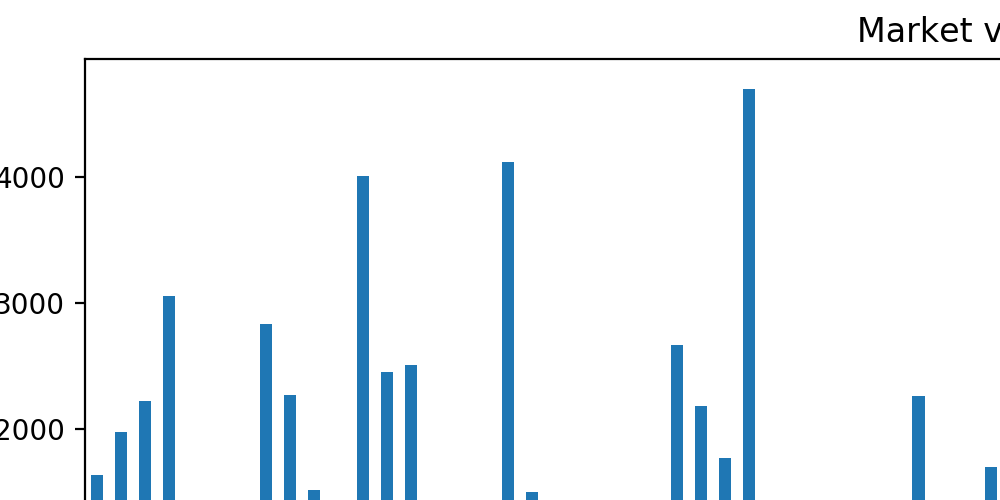

In [163]:
depreciate_merge_df = depreciate_merge_df.reset_index()


# Pandas can also plot multiple columns if the DataFrame includes them
multi_plot = depreciate_merge_df["Percent Change"].plot(kind="bar", figsize=(20,5))

# PandasPlot.set_xticklabels() can be used to set the tick labels as well. It will automatically only take numerical columns.
multi_plot.set_xticklabels(depreciate_merge_df["Market Area"])

plt.title("Greatest Depreciation 2015-2019")
plt.savefig("PercentChangebyArea.png")

plt.tight_layout()
plt.show()


In [1]:
# Pandas can also plot multiple columns if the DataFrame includes them
temi_bar_graph = MarketSummary2["Total Sold"].plot(kind="bar", figsize=(10,5))

# PandasPlot.set_xticklabels() can be used to set the tick labels as well. It will automatically only take numerical columns.
multi_plot.set_xticklabels(MarketSummary2["Market Area"])

plt.title("Market vs Total Sold")
plt.savefig("MarketvsTotalsold.png")

plt.tight_layout()
plt.show()

NameError: name 'MarketSummary2' is not defined

In [162]:
MarketSummary2['Affordable Housing Percentage'] = MarketSummary2['Affordable Housing Percentage'].astype(float)

# Obtain the x and y coordinates for each of the three city types
x_axis = MarketSummary2["Market Area"]
y_axis = MarketSummary2["Sold Price"]
size = (MarketSummary2["Total Sold"]*.5)
#labels = [['Highly Affordable', 'coral'], ['Somewhat Affordable', 'skyblue'], ['Not Afforable', 'gold']]
#colors = []

#for color in MarketSummary2["Affordable Housing Percentage"]:
#    if color>="75":
#        colors.append("coral")
#    elif color<="75":
#        colors.append("skyblue")
#    elif color<="25":
#        colors.append("gold")
        
# Build the scatter plots for each city types
#plt.scatter('area', 'poptotal', data=midwest.loc[midwest.category==category, :]
#, s='dot_size', c=colors[i], label=str(category), edgecolors='black', linewidths=.5)




plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black", s=size, alpha=0.75)

# Incorporate the other graph properties
plt.title("Sold Price by Market Area")
plt.xlabel("Market Area")
plt.ylabel("Sold Price")
plt.grid(True)
# Create a legend
#adjust the area???!!@#@!!@#
#for area in labels:
#    plt.scatter([], [], c=area[1], alpha=1, s=10, label=area[0])
    
#plt.legend(scatterpoints=1, frameon=True, labelspacing=0.5, title='Total Sold')

# Incorporate a text label regarding circle size
plt.text(82, 33, 'Note: Plot size correlates to total houses sold in area', ha='left', va='center', wrap=True)

# Save Figure


plt.ylim(0, 2000000)

plt.savefig("MarketAreavsSoldPrice.png")
plt.show()
